In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
for feature in data.columns:
    print('total null value in "{}" ---> {}'.format(feature,data[feature].isnull().sum()) )

total null value in "PassengerId" ---> 0
total null value in "Survived" ---> 0
total null value in "Pclass" ---> 0
total null value in "Name" ---> 0
total null value in "Sex" ---> 0
total null value in "Age" ---> 177
total null value in "SibSp" ---> 0
total null value in "Parch" ---> 0
total null value in "Ticket" ---> 0
total null value in "Fare" ---> 0
total null value in "Cabin" ---> 687
total null value in "Embarked" ---> 2


### Lets visualize the null value using heatmap present in seaborn library

<AxesSubplot:>

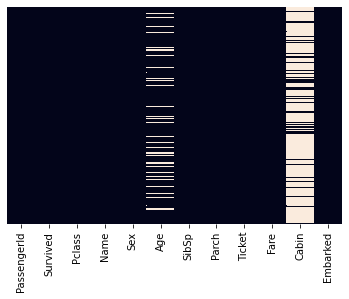

In [109]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

from this visualization we can infer that Age column has about 25 percent of missing value which can be handled with reasonable replacement.By looking into Cabin column we are just missing enough amount of data which can be dropped or can be replaced with feature "Cabin Known:1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

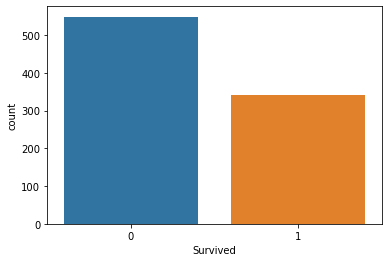

In [110]:
#Here will roughly count how many survived 
sns.countplot(x='Survived',data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

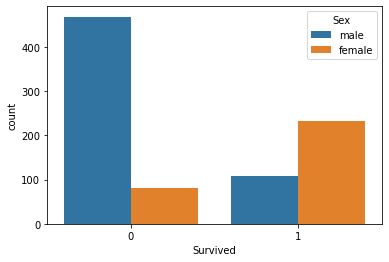

In [111]:
#now we will deep dive and visualize how many males or females survived
sns.countplot(x='Survived',hue='Sex',data = data)

from this we can infer that female counts are more as compared to male count 

<AxesSubplot:xlabel='Survived', ylabel='count'>

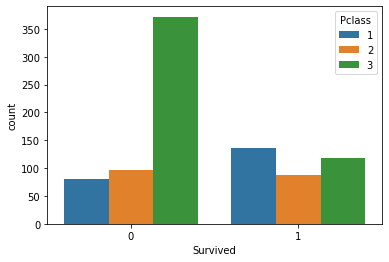

In [112]:
sns.countplot(x='Survived',hue='Pclass',data=data)

Here Pclass refer to lower,middle and upper class ,according to this we come to know that upper class survival are more as compared to other classes and shockingly middle class survival is less as compared to lower class

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

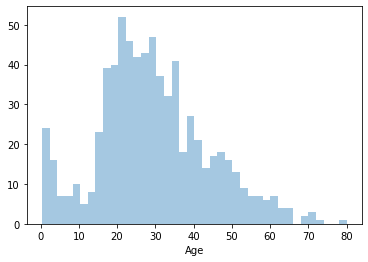

In [113]:
#We use distplot to check the distribution of feature or variable whether it forms Normal/Gaussian Distribution or a bell shaped
#curve if it doesn't then we use logarithmic funtion to convert that particular feature into normal distribution 
sns.distplot(data['Age'],kde=False,bins=40)

from this we come to know that there were maximum passenger of age group ranging between 17-35

<AxesSubplot:xlabel='SibSp', ylabel='count'>

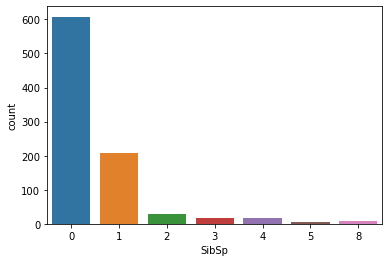

In [114]:
sns.countplot(x='SibSp',data = data)

Here "SibSp" means Sibling/Spouse from the above visualization we come to know that over 600 passenger where not having siblings or spouse

<AxesSubplot:xlabel='Parch', ylabel='count'>

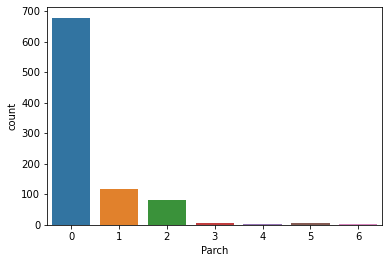

In [115]:
sns.countplot(x='Parch',data=data)

Here "Parch" means Parents/Child ,here we can see that maximum number of childer aboard to titanic with their nanny so '0' signifies children going with their nanny and others are going with their parents 

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

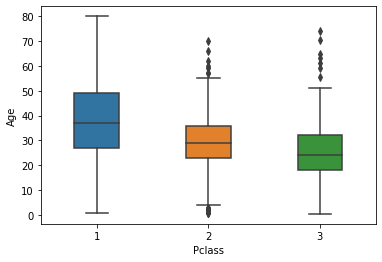

In [116]:
sns.boxplot(x='Pclass',y='Age',data=data,width=0.4)

In [117]:
def imputate(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        elif Pclass == 3:
            return 24
        
    else:
        return Age

In [118]:
cols=['Age','Pclass']
data['Age'] = data[['Age','Pclass']].apply(imputate,axis=1)



<AxesSubplot:>

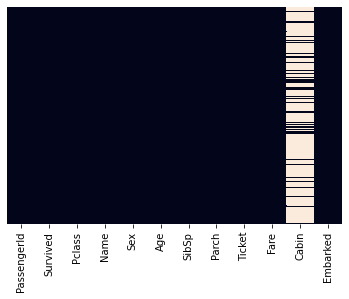

In [119]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

### Columns "Name" and "Ticket" are of no use so we will just drop this column before that we will convert "Sex" and "Embarked" column into numeric feature using one-hot encoding(method used to handle the categorical feature) and after one-hot encoding we will drop one column. 
### Let's take for eg: In "Sex" column we have 2 unique feature namely Male and Female after applying one-hot encoding we will get 2 column, Male column having "1" and "0" value, 1 --> Male and 0 --> Female so there is no need of separate column for Female having "1" and "0" value for female and male respectively so we will drop this column ,this process is called Dummy Variable Trap
### So basically for any feature the formula  will be = unique_feature - 1
### If we take Embarked Column we have 3 unique feature so according to our formula the total columns will be 
### = unique_feature - 1
### = 3-1
### = 2 columns

In [120]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [121]:
pd.get_dummies(data['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [122]:
embark = pd.get_dummies(data['Embarked'],drop_first=True).head()
sex = pd.get_dummies(data['Sex'],drop_first=True).head()

In [123]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [124]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,1,0,3,22.0,1,0,7.2500,NaN
1,2,1,1,38.0,1,0,71.2833,C85
2,3,1,3,26.0,0,0,7.9250,NaN
3,4,1,1,35.0,1,0,53.1000,C123
4,5,0,3,35.0,0,0,8.0500,NaN


In [125]:
data = pd.concat([data,sex,embark],axis=1)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,C85,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,NaN,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,C123,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,NaN,1.0,0.0,1.0


In [126]:
print('total count of distinct labels of Cabin Variable are {} '.format(len(data['Cabin'].unique())))

total count of distinct labels of Cabin Variable are 148 


In [127]:
#count total number of null value out 891 records in Cabin variable
data['Cabin'].isnull().sum()

687

In [128]:
#replace NaN with missing value and use Label encoder to convert categorical to numeric feature
data['Cabin'] = data['Cabin'].fillna('Missing')

In [129]:
data['Cabin'].isnull().sum()

0

In [130]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Cabin']= le.fit_transform(data['Cabin'])
data['Cabin']

0      146
1       81
2      146
3       55
4      146
      ... 
886    146
887     30
888    146
889     60
890    146
Name: Cabin, Length: 891, dtype: int32

In [131]:
data.drop(['PassengerId'],axis = 1,inplace=True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,0,3,22.0,1,0,7.2500,146,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,81,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,146,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,55,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,146,1.0,0.0,1.0


In [132]:
data.Cabin.value_counts().sort_values(ascending=False).head(10)

146    687
63       4
47       4
145      4
62       3
142      3
141      3
90       3
116      3
20       2
Name: Cabin, dtype: int64

In [133]:
feature_scale = [feature for feature in data.columns]
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(data[feature_scale])

MinMaxScaler()

In [134]:
feature_scale

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'male',
 'Q',
 'S']

In [135]:
data = pd.DataFrame(scalar.transform(data[feature_scale]))
data.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.993197,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.551020,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.993197,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.374150,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.993197,1.0,0.0,1.0
